# Contents
1. Import Libraries
2. Clean Data
3. Visiual Exploration
4. Hypothesis
5. Reshape Variables
6. Training and Testing set
7. Linear Regression
8. Plot
9. Interpretation
10. Check Performance
11. Compare Predicted Values
12. Reflections

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# make a path to project folder
path = r'C:\Users\egrnw\anaconda3\Achievement 6 Project'

In [4]:
#Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC data EXTRA cleaned.csv'), index_col = False)

## 2. Clean Data

In [5]:
df.columns

Index(['Unnamed: 0', 'R_fighter', 'B_fighter', 'Referee', 'date', 'City',
       'State/Province', 'Country', 'Winner', 'title_bout',
       ...
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age', 'Winner_encoded'],
      dtype='object', length=148)

In [6]:
df.drop(columns=['Unnamed: 0'])

,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,weight_class,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,Bantamweight,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,1
1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,Middleweight,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,1
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,Heavyweight,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,1
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,WomenStrawweight,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,0
4,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,WomenBantamweight,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,1
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,1
6009,Johnny Rhodes,David Levicki,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,1
6010,Patrick Smith,Ray Wizard,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,1


In [7]:
df.shape

(6012, 148)

In [8]:
dups = df.duplicated()

In [9]:
dups.shape # No dups

(6012,)

In [10]:
df.isnull().sum()

Unnamed: 0          0
R_fighter           0
B_fighter           0
Referee            32
date                0
                 ... 
R_Reach_cms       406
R_Weight_lbs        2
B_age             172
R_age              63
Winner_encoded      0
Length: 148, dtype: int64

In [11]:
# find median
B_height_median = df['B_Height_cms'].median()

In [12]:
# impute missing values
df.fillna({'B_Height_cms': B_height_median}, inplace=True)

In [13]:
# find median
R_height_median = df['R_Height_cms'].median()

In [14]:
# impute missing values
df.fillna({'R_Height_cms': R_height_median}, inplace=True)

In [15]:
# find median
B_weight_median = df['B_Weight_lbs'].median()

In [16]:
# impute missing values
df.fillna({'B_Weight_lbs': B_weight_median}, inplace=True)

In [17]:
# find median
R_weight_median = df['R_Weight_lbs'].median()

In [18]:
# impute missing values
df.fillna({'R_Weight_lbs': R_weight_median}, inplace=True)

In [19]:
# find median
B_reach_median = df['B_Reach_cms'].median()

In [20]:
# impute missing values
df.fillna({'B_Reach_cms': B_reach_median}, inplace=True)

In [21]:
# find median
R_reach_median = df['R_Reach_cms'].median()

In [22]:
# impute missing values
df.fillna({'R_Reach_cms': R_reach_median}, inplace=True)

## 3. Visiual Exploration

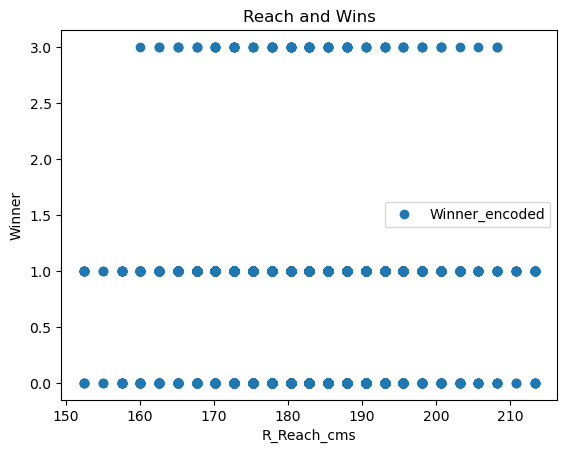

In [23]:
# Scatterplot of reach and wins

df.plot(x = 'R_Reach_cms', y='Winner_encoded',style='o')
plt.title('Reach and Wins')  
plt.xlabel('R_Reach_cms')  
plt.ylabel('Winner')  
plt.show()

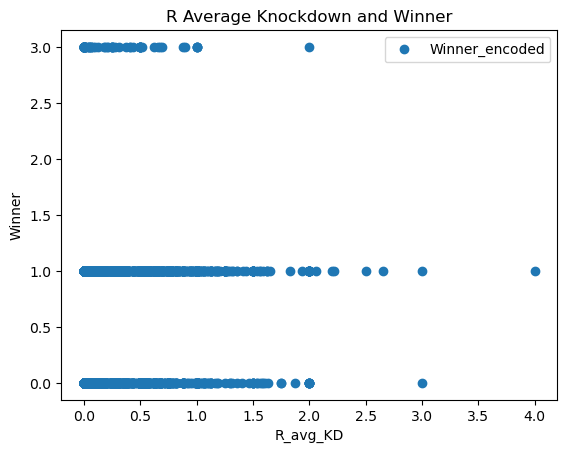

In [24]:
# Scatterplot

df.plot(x = 'R_avg_KD', y='Winner_encoded',style='o')
plt.title('R Average Knockdown and Winner')  
plt.xlabel('R_avg_KD')  
plt.ylabel('Winner')  
plt.show()

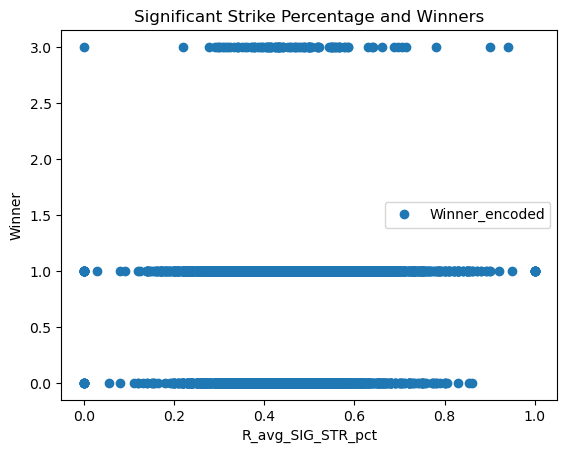

In [25]:
df.plot(x = 'R_avg_SIG_STR_pct', y='Winner_encoded',style='o')
plt.title('Significant Strike Percentage and Winners')  
plt.xlabel('R_avg_SIG_STR_pct')  
plt.ylabel('Winner')  
plt.show()

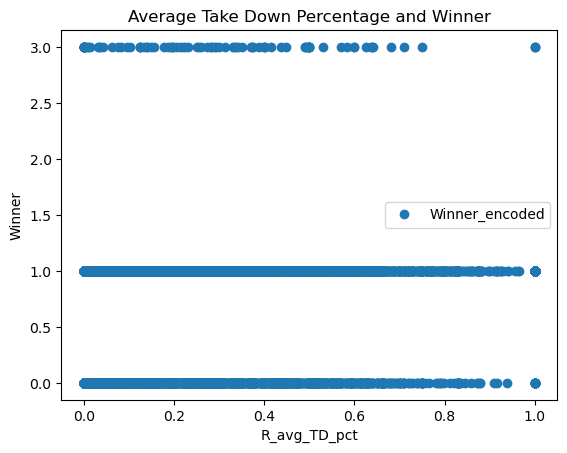

In [26]:
df.plot(x = 'R_avg_TD_pct', y='Winner_encoded',style='o')
plt.title('Average Take Down Percentage and Winner')  
plt.xlabel('R_avg_TD_pct')  
plt.ylabel('Winner')  
plt.show()

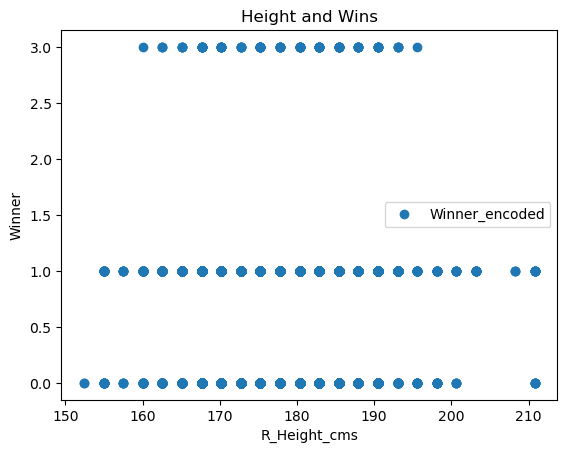

In [27]:
df.plot(x = 'R_Height_cms', y='Winner_encoded',style='o')
plt.title('Height and Wins')  
plt.xlabel('R_Height_cms')  
plt.ylabel('Winner')  
plt.show()

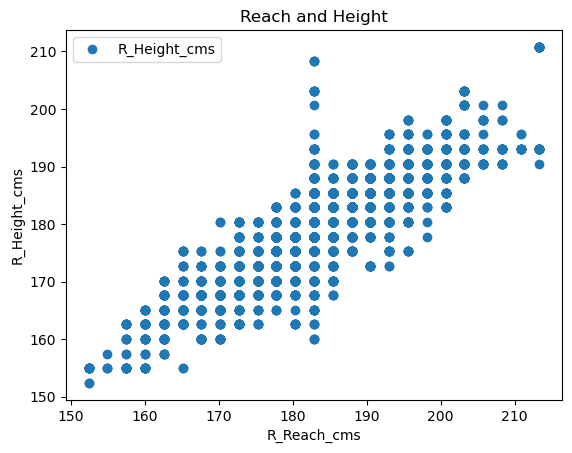

In [28]:
# Scatterplot of reach and height

df.plot(x = 'R_Reach_cms', y='R_Height_cms',style='o')
plt.title('Reach and Height')  
plt.xlabel('R_Reach_cms')  
plt.ylabel('R_Height_cms')  
plt.show()

## 4. Hypothesis

Taller fighters have longer reach

## 5. Reshape Variables

In [128]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X_1 = df['R_Reach_cms'].values.reshape(-1,1)
y_1 = df['R_Height_cms'].values.reshape(-1,1)

## 6. Training and Testing set

In [129]:
# Spliting data into a training set and a test set
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

## 7. Linear Regression

In [130]:
# Creating a regression object
regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [131]:
# Fit the regression object onto the training set
regression_1.fit(X_1_train, y_1_train)

LinearRegression()

In [132]:
# Predict the values of y using X
y_1_predicted = regression_1.predict(X_1_test)

## 8. Plot

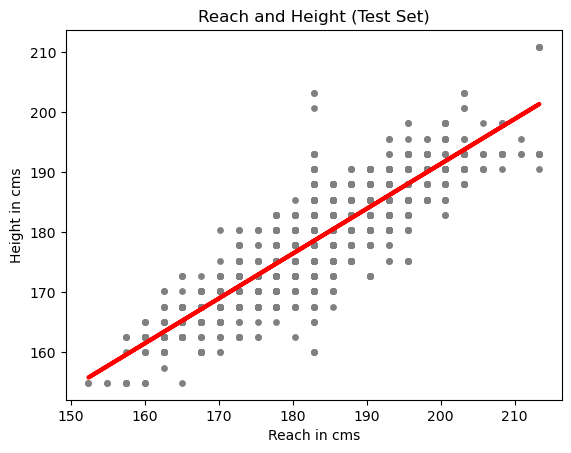

In [133]:
# Create the plot in the desired format
plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s=15)  # Scatter plot for the test set
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth=3)  # Regression line

# Set plot title and labels
plot_test_1.title('Reach and Height (Test Set)')
plot_test_1.xlabel('Reach in cms')
plot_test_1.ylabel('Height in cms')

# Show the plot
plot_test_1.show()

## 9. Interpretation

The scatterplot shows a positive relationship between height and reach.
There are some outliers that may skew the results. 

## 10. Check Performance

In [134]:
# Creating objects that contain the model summary statistics
rmse_1 = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2_1 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [135]:
# Print the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.7462673]]
Mean squared error:  19.44669980523543
R2 score:  0.7591065671128323


## 11. Compare Predicted Values

In [136]:
# Create a dataframe comparing the actual and predicted values of y.
data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,175.26,178.579895
1,177.80,182.370933
2,160.02,167.206781
3,182.88,180.475414
4,185.42,178.579895
5,185.42,184.266452
6,190.50,188.057490
7,187.96,178.579895
8,167.64,170.997819
9,162.56,161.520224


In [137]:
# Predict
y_1_predicted_train = regression_1.predict(X_1_train) # This is predicting X_1_train

In [138]:
rmse_1 = mean_squared_error(y_1_train, y_1_predicted_train)
r2_1 = r2_score(y_1_train, y_1_predicted_train)

In [139]:
# Print the model summary statistics. This is where we evaluate the performance of the model
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.7462673]]
Mean squared error:  19.45094915240582
R2 score:  0.7448983955160237


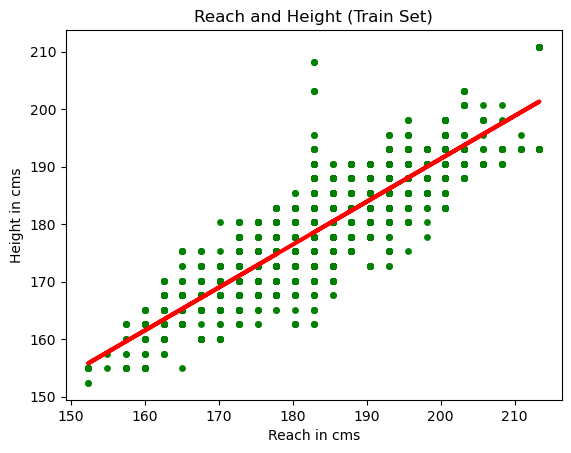

In [140]:
# Visualizing the Training set Results
plot_test_1 = plt
plot_test_1.scatter(X_1_train, y_1_train, color='green', s=15)  # Scatter plot for the train set
plot_test_1.plot(X_1_train, y_1_predicted_train, color='red', linewidth=3)  # Regression line

# Set plot title and labels
plot_test_1.title('Reach and Height (Train Set)')
plot_test_1.xlabel('Reach in cms')
plot_test_1.ylabel('Height in cms')

# Show the plot
plot_test_1.show()

## 12. Reflections

With an R2 score of 0.74 we can safely say that there is a positive relationship between height and reach. 